# Welcome to Git-DS training 
- We are going to use a in house developed library to compute efficient portfolio (with 2 assets)
- ...
- ...

## Markowtiz

Given 2 assets $A_1$, $A_2$, with expected retunns R_1, $R_2$

In [1]:
from function_utils import Portfolio, PortfolioManager, Asset

In [2]:
ASSETS = ['GOOGL', 'AAPL']

In [3]:
asset = Asset('GOOGL')

In [4]:
history_prices = asset._history.reset_index()

/tmp/ipykernel_161569/2888223191.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


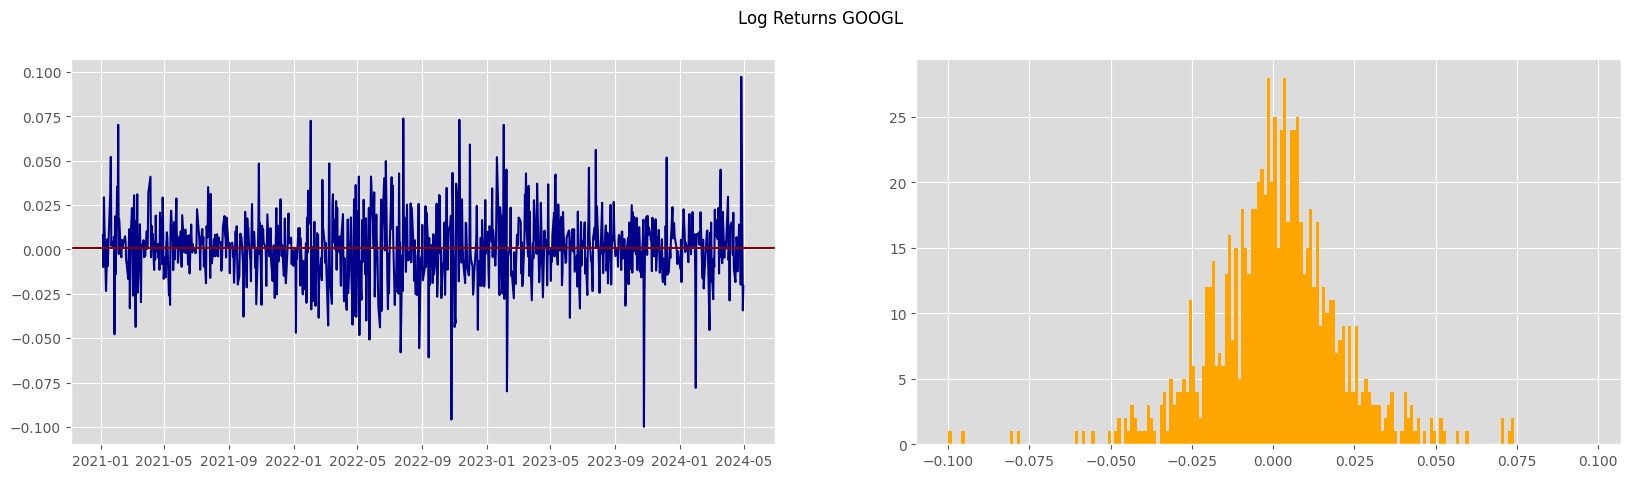

In [5]:
fig, ax = asset.plot_time_series()
fig.show()

In [6]:
base_portfolio = Portfolio(ASSETS, weights=[0.5, 0.5])

In [7]:
base_portfolio

Portfolio(Assets=[GOOGL, AAPL], Weights=[0.5, 0.5])

In [8]:
manager = PortfolioManager('markowitz', base_portfolio)

In [9]:
manager

PortfolioManager(base_portfolio=Portfolio(Assets=[GOOGL, AAPL], Weights=[0.5, 0.5]), markowitz)

/tmp/ipykernel_161569/2255071222.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


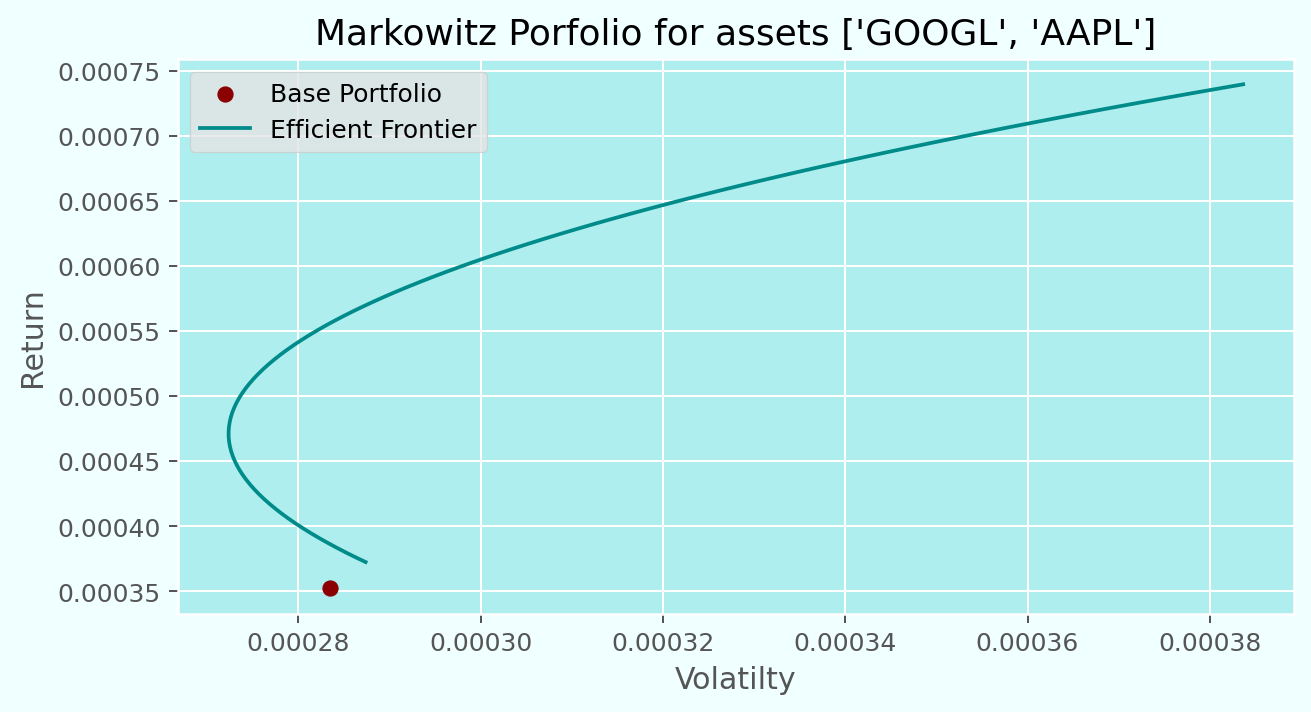

In [10]:
fig, ax = manager.plot_efficient_frontier()
fig.show()